<a href="https://colab.research.google.com/github/IvanLuque0/sis1_group7/blob/main/Network_Engineering_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab 2 - Wi-Fi Throughput**

In this lab we will meet Wi-Fi! Specifically, we will investigate the throughput by changing several parameters of the system.

##Introduction

Consider a situation like the one in the classroom. Each one of us uses its own station (STA) to access the Internet using a common Wi-Fi access point (AP). In such cases, everyone wants to access the channel at the same time. We would like to do this somewhat fairly, so we allow our STAs to attempt their transmissions randomly. Sounds simple? Let's see how powerful it is in practice!

Our main assumption is:

* we always have a packet ready to be transmitted.

Our basic tools are:

* the transmission probability of a device $\tau$,
* the probability that a slot is empty $p_0$ (no transmissions),
* the probability that there is only one transmission in a slot $p_1$ (a successful one),
* the probability that there are more than one transmission in a slot $p_{>1}$ (a collision).

Also:

* the thoughput $\Gamma$ is the ratio of the successfully transmitted bits over a certain amount of time.

Let's start by calculating the Wi-Fi throughput on paper. Then, we will validate our results using the simulator and investigate the effect of the contention window and the packet length on throughput.

###Preliminaries

Calculate the aggregate Wi-Fi throughput for $N=10$ stations, if $\textrm{CW}=32$ is the contention window and $L=12000~\textrm{bits}$ is the packet length. First, find the values of the transmission probability $\tau$ and the slot probabilities $p_0$, $p_1$ and $p_{>1}$. Note that the corresponding transmission times are $T_0 = 9~\mu\textrm{s}$ and $T_{1}=T_{>1}=0.289~\textrm{ms}$.

In [12]:
# You can do your calculations here or on paper!
N = 10
CW = 32
L = 12000
T0 = 9*(10**(-6))
Tn = 0.289*10**(-3)
Eb = CW/2
t = 1/Eb # Transmission probability

Pe = (1-t)**N
print(f"Probability that none of the devices access: {Pe}") # Empty slot probability

Ps = N*t*(1-t)**(N-1)
print(f"Probability that there's a device: {Ps}") # Succesfull slot probability

Pc = 1 - Pe - Ps
print(f"Probability that more than one device wants to be transmitted: {Pc}") # Collision slot probability


Probability that none of the devices access: 0.524460475048727
Probability that there's a device: 0.3496403166991513
Probability that more than one device wants to be transmitted: 0.12589920825212175


##Setup

Use the following steps to download, compile and run the simulation. You may save a copy of this Notebook, but don't forget to connect your Google Drive as well, in order to save your files. **This virtual machine is temporary!**

**Connect your Google Drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Download**

In [7]:
!wget https://anakatolakkos.gitlab.io/temp/NE-Lab2.zip

--2025-01-27 16:21:10--  https://anakatolakkos.gitlab.io/temp/NE-Lab2.zip
Resolving anakatolakkos.gitlab.io (anakatolakkos.gitlab.io)... 35.185.44.232, 2600:1901:0:7b8a::
Connecting to anakatolakkos.gitlab.io (anakatolakkos.gitlab.io)|35.185.44.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76990 (75K) [application/zip]
Saving to: ‘NE-Lab2.zip’

NE-Lab2.zip         100%[===================>]  75.19K   314KB/s    in 0.2s    

2025-01-27 16:21:11 (314 KB/s) - ‘NE-Lab2.zip’ saved [76990/76990]



**Extract**

In [8]:
!mypath="drive/MyDrive/NE-Labs"; mkdir $mypath; cp NE-Lab2.zip $mypath; cd $mypath; unzip NE-Lab2.zip

mkdir: cannot create directory ‘drive/MyDrive/NE-Labs’: File exists
Archive:  NE-Lab2.zip
   creating: NE-Lab2/
   creating: NE-Lab2/WLANSim/
  inflating: NE-Lab2/WLANSim/Tools.h  
   creating: NE-Lab2/WLANSim/COST/
  inflating: NE-Lab2/WLANSim/COST/config.h  
  inflating: NE-Lab2/WLANSim/COST/corsa_alloc.h  
  inflating: NE-Lab2/WLANSim/COST/cost.h  
  inflating: NE-Lab2/WLANSim/COST/cxx  
  inflating: NE-Lab2/WLANSim/COST/ether_addr.h  
  inflating: NE-Lab2/WLANSim/COST/path.h  
  inflating: NE-Lab2/WLANSim/COST/priority_q.h  
  inflating: NE-Lab2/WLANSim/COST/sense.h  
  inflating: NE-Lab2/WLANSim/Channel.h  
  inflating: NE-Lab2/WLANSim/Node.h  
  inflating: NE-Lab2/WLANSim/WLANSim.cc  
  inflating: NE-Lab2/WLANSim/build_local  


**Compile**

In [9]:
!mypath="drive/MyDrive/NE-Labs"; cd $mypath/NE-Lab2/WLANSim; chmod +x build_local COST/cxx; LD_PRELOAD= ./build_local

**Run**

What are these parameters? Check the source code to find out!

In [10]:
!mypath="drive/MyDrive/NE-Labs"; cd $mypath/NE-Lab2/WLANSim; ./WLANSim 100 10 12000 1024 0.0

############################# WLAN Simulator ##############################
--- The simulation starts -------------------------------------------------

--- Channel ---
Slot Probabilities: Empty = 0.980690, Successful = 0.019141, Collision = 0.000169 

--- AP (node 0 - Access Point) --- 
Transmission Probability (tau) = 0.001938 | Collision Probability (p) = 0.017472 
Throughput = 132.150000 [packets/second] | 1585800.000000 [bits/second] 

--- A single STA (node 1 - all STAs are the same) --- 
Transmission Probability (tau) = 0.001942 | Collision Probability (p) = 0.018921 
Throughput = 132.220000 [packets/second] | 1586640.000000 [bits/second] 

--- Results WLANSim -------------------------------------------------------
Wi-Fi network Throughput (all nodes, AP + stations) = 15858000.000000 [bits/second]

# -------------------------------------------------------------------------
# CostSimEng with SimpleQueue, stopped at 100.000000
# 13882238 events processed in 2.851 seconds, event pr

##Exercises

Below there are some exercises. Get some results and explain them. Also, you may use `matplotlib` to plot your results.


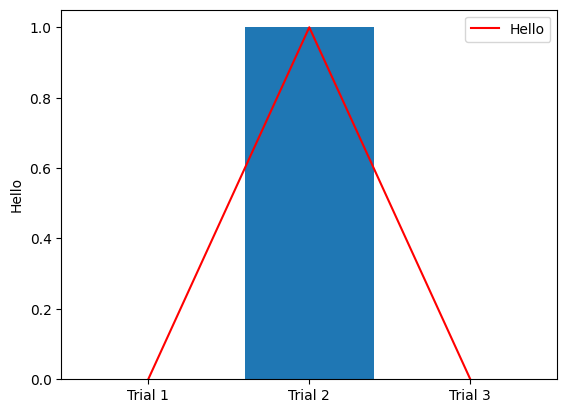

In [21]:
import matplotlib.pyplot as plt

# Bar plot
plt.bar(['Trial 1', 'Trial 2', 'Trial 3'],[0, 1, 0])

# Line plot
plt.plot(['Trial 1', 'Trial 2', 'Trial 3'],[0, 1, 0], color='red', label='Hello')

plt.ylabel('Hello')

plt.legend()
plt.show()

###Exercise 1
Validate the aggregate throughput obtained in the exercice proposed in the preliminaries section using the simulator.

In [36]:
AvST = T0*Pe + Tn*Ps + Tn*Pc
Th = ((Ps*L)/AvST)*10**(-6)
print(f"The aggregate throughput obtained is: {Th:.2f} Mbps")

The aggregate throughput obtained is: 15.97 Mbps


###Exercise 2

Is the $\textrm{CW}=32$ optimal? Find the optimal $\textrm{CW}$ value using the simulator. Possible $\textrm{CW}$ values are $4,8,16,32,64,128,256,512$ and $1024$. Plot in the x-axis the $\textrm{CW}$ values tested, and the network throughput in the y-axis. Similarly, plot the *slot probabilities* (3 curves) against the $\textrm{CW}$ values in a different plot.

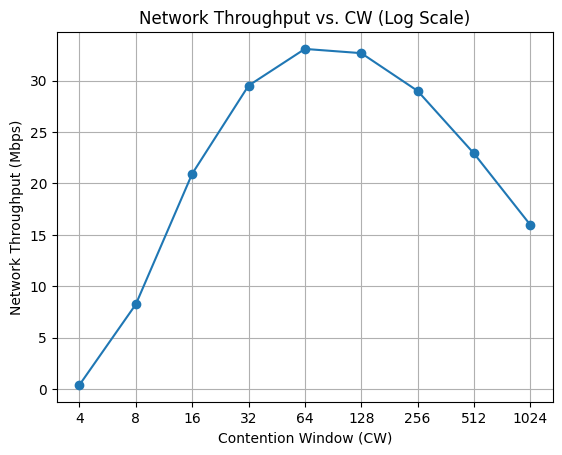

In [37]:
# CW values
CWs = [];
for i in range (2, 11, 1):
  CWs.append(2**i)

# Throughput values
Thvals = []
for e in CWs:
  Eb = e/2
  t = 1/Eb
  Pe = (1-t)**10
  Ps = N*t*(1-t)**(N-1)
  Pc = 1 - Pe - Ps
  AvST = T0*Pe + Tn*Ps + Tn*Pc
  Th = ((Ps*L)/AvST)*10**(-6)
  Thvals.append(Th)

plt.plot(CWs, Thvals, marker='o')
plt.xscale('log', base=2)
plt.xticks(CWs, CWs)
plt.xlabel('Contention Window (CW)')
plt.ylabel('Network Throughput (Mbps)')
plt.title('Network Throughput vs. CW (Log Scale)')
plt.grid(True, which='both')
plt.show()

The optimal CW is 64, because is the one with the highest throughput.

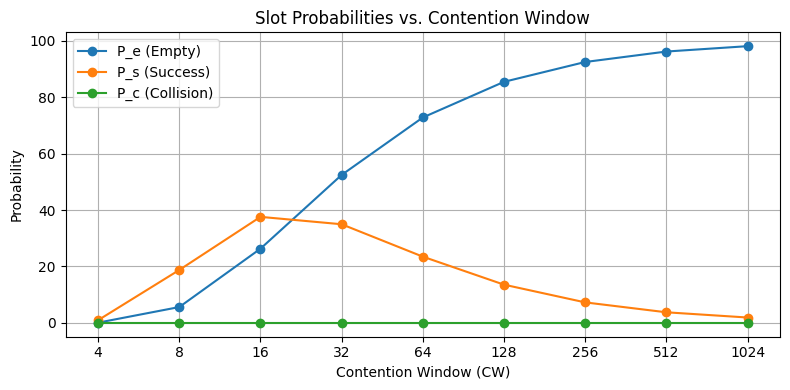

In [40]:
Pes = []
Pss = []
Pcs = []

for e in CWs:
  Eb = e/2
  t = 1/Eb
  Pes.append(((1-t)**10)*100)
  Pss.append((N*t*(1-t)**(N-1))*100)
  Pcs.append((1 - Pe - Ps)*100)

plt.figure(figsize=(8, 4))

# Plot each probability vs. CW on the same axes
plt.plot(CWs, Pes, marker='o', label='P_e (Empty)')
plt.plot(CWs, Pss, marker='o', label='P_s (Success)')
plt.plot(CWs, Pcs, marker='o', label='P_c (Collision)')

# Label and style
plt.xlabel('Contention Window (CW)')
plt.ylabel('Probability')
plt.title('Slot Probabilities vs. Contention Window')
plt.grid(True)
plt.xscale('log', base=2)
plt.xticks(CWs, CWs)
plt.legend()

plt.tight_layout()
plt.show()

###Exercise 3

Repeat the previous exercise (optimal $\textrm{CW}$ value) if the number of stations is: a) $N=4$, and b) $N=20$. Explain the obtained results.

###Exercise 4

Investigate what is the effect of the packet size on the throughput. To do so, use $N=10$ and $\textrm{CW}=32$. Plot the aggregate Wi-Fi throughput (y-axis) for $L=100,1000,10000$ and $100000$ (x-axis). Explain the obtained results.

###Also, here is an optional exercice if you have time!

Modify the simulator `WLANsim.cc` in a way the AP gets the introduced $\textrm{CW}$ value, but the STAs get $2\times\textrm{CW}$. Run the simulator for different number of stations, and explain the results.